# Road Damage Dataset Tutorial
Welcome to the tutorial of Road Crack Dataset.
In this tutorial, we will show you:
- How to download Road Crack Dataset
- The structure of the Dataset
- The statistical information of the dataset


# Required library
In this tutorial, you need to set up tensorflow 1.4 (We recommend tensorflow-gpu 1.4).

It takes only 10 mins if you already prepared CUDA settings, please view [tensorflow website](https://www.tensorflow.org/install/). We recomend [Installing with virtualenv](https://www.tensorflow.org/install/install_linux).
- tensorflow 1.4

# The sturcture of Road Damage Dataset
Road Damage Dataset contains trained models and Annotated images.
Annotated images are presented as the same format to [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).

- RoadCrackDataset (dataset structure is the same format as PASCAL VOC)
##TODO

# The Definition of Road Damage

<img src="images/RoadDamageTypeDef.png">

# OK! So let's get started!
# First, download dataset and

First you need to download and extract the dataset and code.

Make sure your disk have 2GB free space for the dataset at least.

In [7]:
import six.moves.urllib as urllib
import os

In [9]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./train.tar.gz'):
    url_base = 'https://mycityreport.s3-ap-northeast-1.amazonaws.com/02_RoadDamageDataset/public_data/IEEE_bigdata_RDD2020/train.tar.gz'
    urllib.request.urlretrieve(url_base, './train.tar.gz')
    
    print("Download train.tar.gz Done")
    
else:
    print("You have train.tar.gz")

Download train.tar.gz Done


In [5]:
if not os.path.exists('./trainedModels.tar.gz'):
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/trainedModels.tar.gz'
    urllib.request.urlretrieve(url_base, './trainedModels.tar.gz')
    
    print("Download trainedModels.tar.gz Done")
    
else:
    print("You have trainedModels.tar.gz")

You have trainedModels.tar.gz


In [10]:
# this procces may take a few minutes
!tar -zxf ./train.tar.gz
# !tar -zxf ./trainedModels.tar.gz

# The statistical information of the dataset

In [1]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [19]:
base_path = os.getcwd()+'\\'

damageTypes=["D00", "D10","D20","D40"]
damageTypes_w = ["Longitudinal Crack", "Transverse Crack", "Aligator Crack", "Pothole"]
# govs corresponds to municipality name.
govs = ["Czech", "India", "Japan"]

In [16]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir("D:\\Anhs\\SMU\\AI\\CS604 CV\\project\\RoadDamageDetector\\train\\" + gov + '\\Annotations\\xmls\\') if not filename.startswith('.')]

    for file in file_list:
#         print(file)
        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open("D:\\Anhs\\SMU\\AI\\CS604 CV\\project\\RoadDamageDetector\\train\\" + gov + '\\Annotations\\xmls\\' +file, 'r')
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：21041
# of labels：34702


D00 : 4049
D10 : 3979
D20 : 6199
D40 : 2243


c:\users\vietd\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


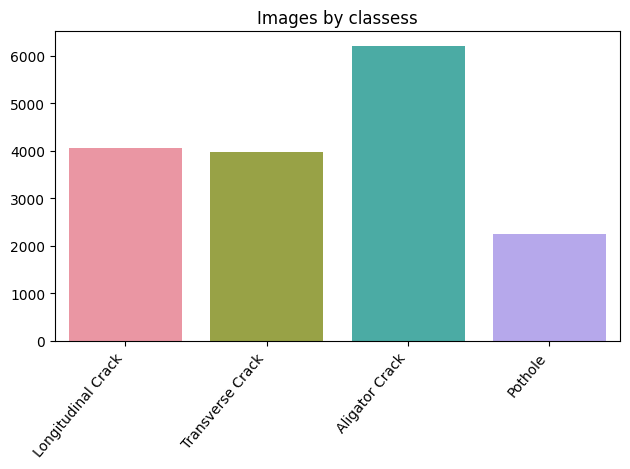

In [48]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
plt.title("Images by classess")
sns.set_palette("BrBG", 2)
ax = sns.barplot(damageTypes_w, cls_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

Czech
# of images：2829
# of labels：1745


c:\users\vietd\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


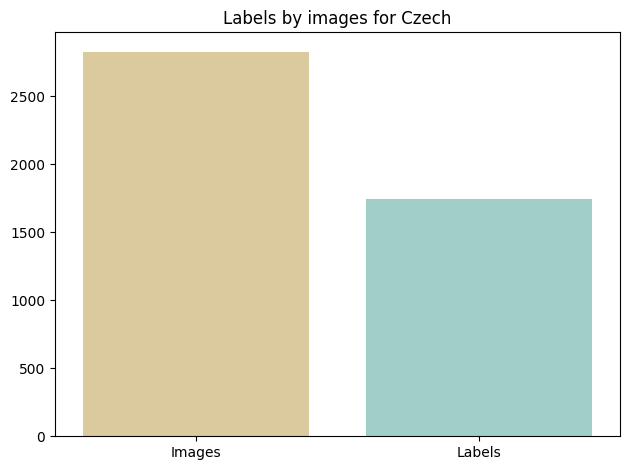

D00 : 988
D10 : 399
D20 : 161
D40 : 197
[988, 399, 161, 197]


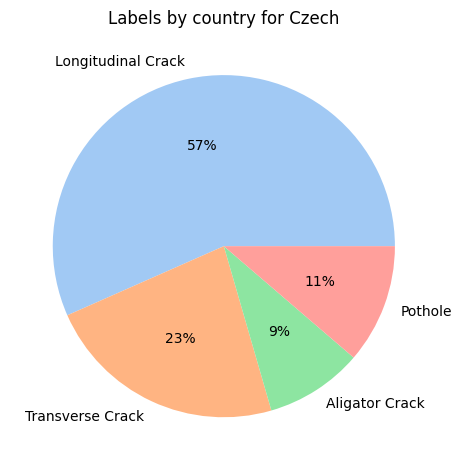

**************************************************
India
# of images：7706
# of labels：8203


c:\users\vietd\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


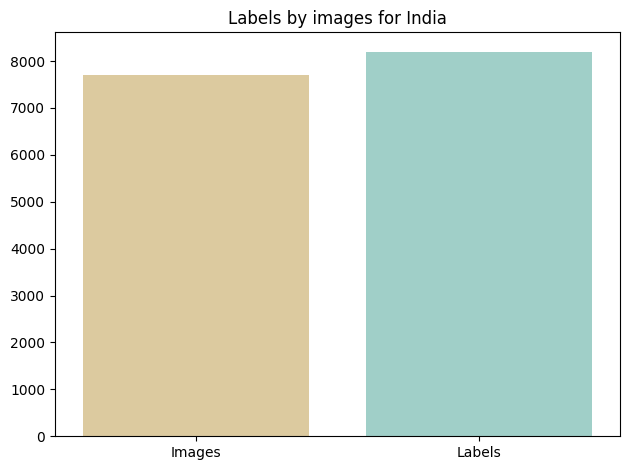

D00 : 1555
D10 : 68
D20 : 2021
D40 : 3187
[1555, 68, 2021, 3187]


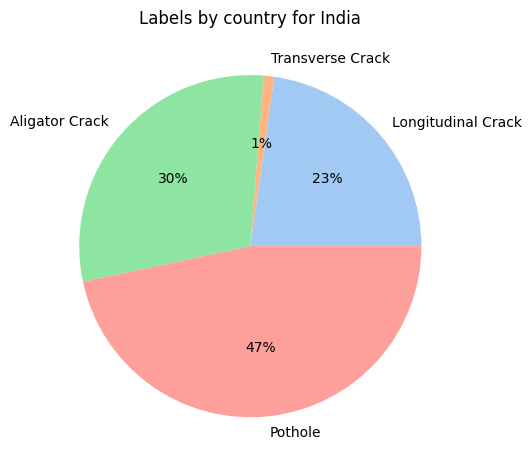

**************************************************
Japan
# of images：10506
# of labels：24754


c:\users\vietd\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


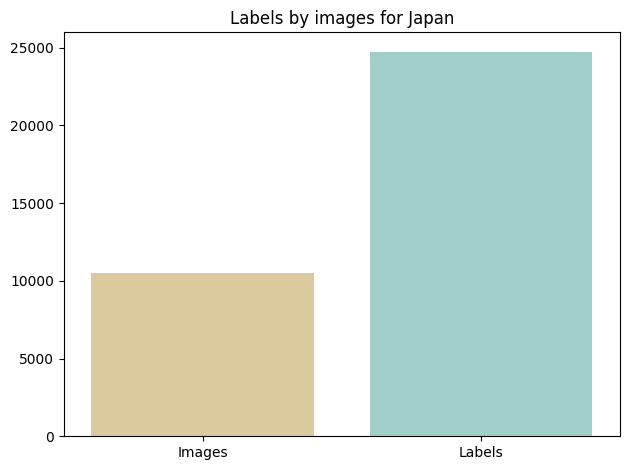

D00 : 4049
D10 : 3979
D20 : 6199
D40 : 2243
[4049, 3979, 6199, 2243]


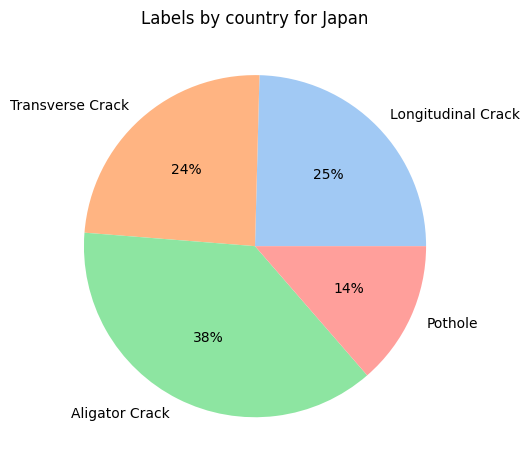

**************************************************


In [53]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir("D:\\Anhs\\SMU\\AI\\CS604 CV\\project\\RoadDamageDetector\\train\\" + gov + '\\Annotations\\xmls\\') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open("D:\\Anhs\\SMU\\AI\\CS604 CV\\project\\RoadDamageDetector\\train\\"  + gov + '\\Annotations\\xmls\\' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    plt.title(f"Labels by images for {gov}")
    sns.set_palette("BrBG", 2)
#     print(type(total_images))
    sns.barplot(["Images", "Labels"], [total_images, len(cls_names)])
    plt.tight_layout()
    plt.savefig(f'image_by_lables_{gov}.png', bbox_inches='tight')
    plt.show()
    count_dict = collections.Counter(cls_names)
    cls_count = []
    lb_dict = {"D00": "Longitudinal Crack", "D10": "Transverse Crack", "D20": "Aligator Crack", "D40": "Pothole"}
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
    print(cls_count)
    colors = sns.color_palette("pastel")[0:4]
    plt.title(f"Labels by country for {gov}")
    plt.pie(cls_count, labels = damageTypes_w, colors=colors, autopct='%.0f%%')
    plt.tight_layout()
    plt.savefig(f'labels_by_country_{gov}.png', bbox_inches='tight')
    plt.show()
    print('**************************************************')

In [ ]:
!rm -rf ./RoadDamageDataset.tar.gz
!rm -rf ./RoadDamageDataset
!rm -rf ./trainedModels.tar.gz
!rm -rf ./trainedModels

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("results.csv", index_col = False)

C:\Users\vietd\AppData\Local\Temp\ipykernel_20600\788666840.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("results.csv", index_col = False)


In [8]:
df

,Precision,Recall,mAP@5,GIoU Loss,Object Loss,Classifier Loss
0,0.2721,0.3512,0.2612,0.10030,0.06201,0.008789
1,0.2752,0.4029,0.2572,0.09623,0.05831,0.008628
2,0.2350,0.2503,0.1962,0.06861,0.07280,0.009793
3,0.2647,0.3945,0.2782,0.10640,0.05469,0.007878
4,0.2679,0.4783,0.3091,0.10520,0.05545,0.008203
5,0.2367,0.5195,0.3290,0.12910,0.05282,0.007887
6,0.2837,0.5528,0.3572,0.15100,0.05084,0.007856
7,0.2951,0.5127,0.3895,0.14460,0.05217,0.007632
8,0.3051,0.5655,0.4408,0.17100,0.05035,0.007481
9,0.3085,0.6039,0.4222,0.17780,0.04962,0.007440


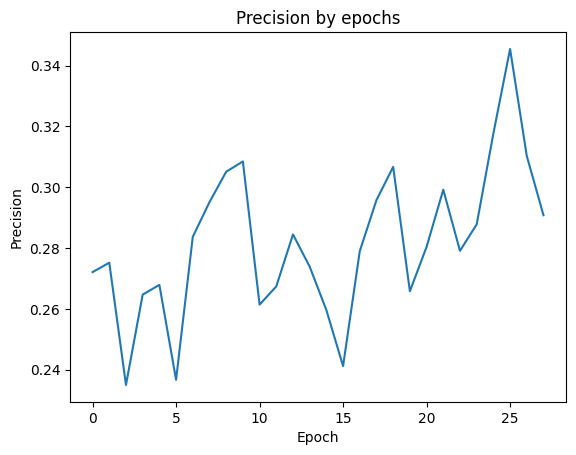

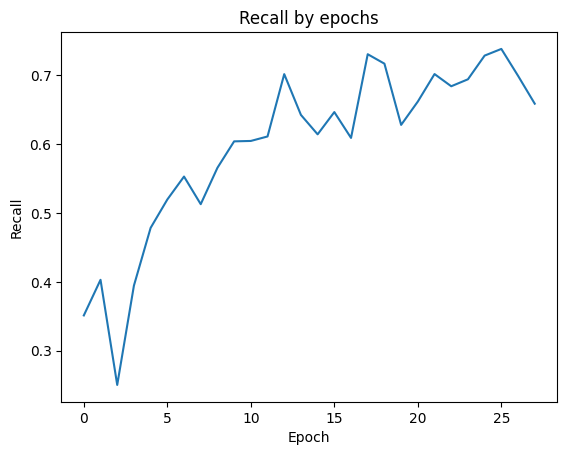

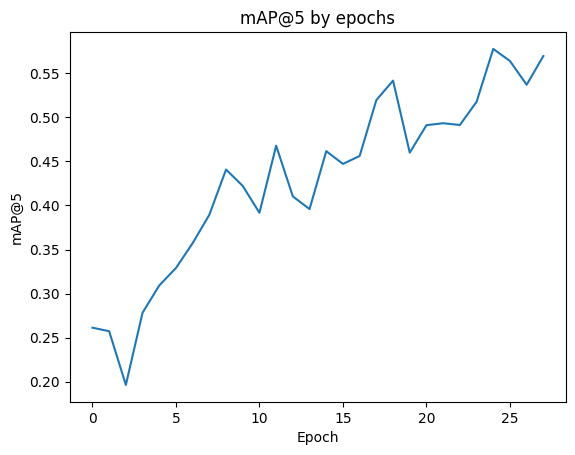

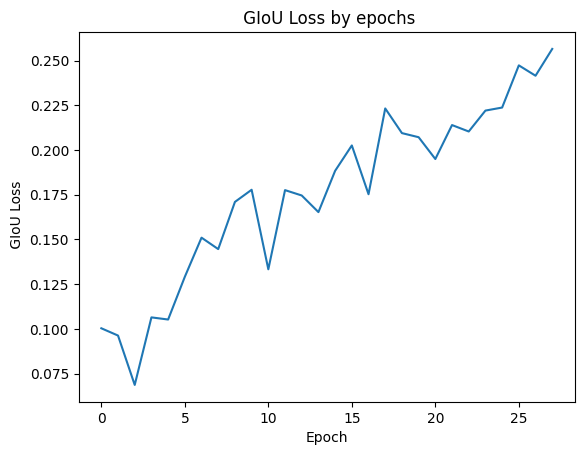

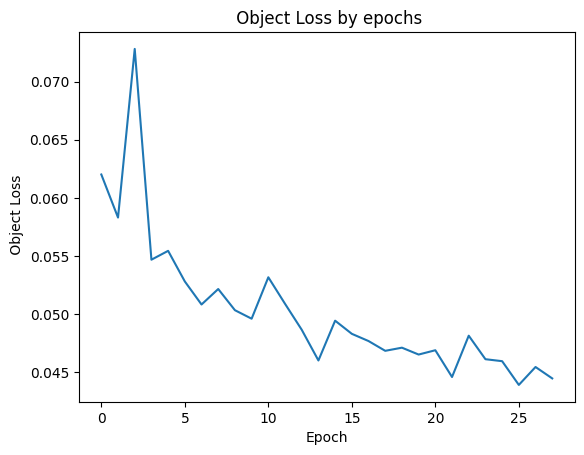

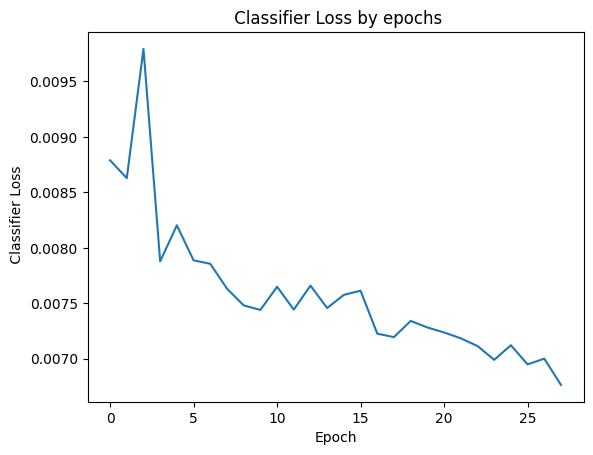

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in df.columns:
    plt.title(f"{c} by epochs")
    sns.lineplot(data=df[c], palette="fsdfsd")
    plt.xlabel("Epoch")
    plt.ylabel(c)
    plt.savefig(f'{c}_by_epochs.png', bbox_inches='tight')
    plt.show()